In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus']=False

In [14]:
df=pd.read_csv(r'D:/比赛/B题/train.csv',parse_dates=['数据时间'])
df.head(3).append(df.tail(3))
df.dtypes

数据时间         datetime64[ns]
总有功功率（kw）           float64
最高温度                float64
最低温度                float64
白天风力风向                int64
夜晚风力风向                int64
天气1                   int64
天气2                   int64
年                     int64
月                     int64
日                     int64
小时                    int64
一年中的第几周               int64
月末                    int64
月初                    int64
季末                    int64
季初                    int64
周末                    int64
dtype: object

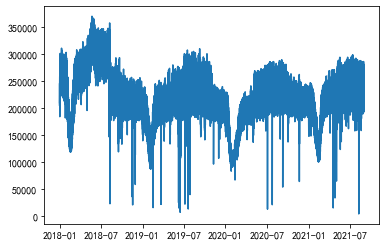

In [15]:
data=df.copy()
data=data.set_index('数据时间')

plt.plot(data.index,data['总有功功率（kw）'].values)
plt.show()

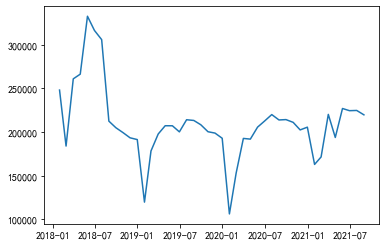

In [16]:
data_month=df.set_index('数据时间').asfreq('M')
plt.plot(data_month.index,data_month['总有功功率（kw）'].values)
plt.show()

In [28]:
train=data.loc['2021/8/18 0:00:00':'2021/8/30 23:45:00',:]
test=data.loc['2021/8/31 0:00:00':,:]

In [29]:
# 单位根检验
print(sm.tsa.stattools.adfuller(train['总有功功率（kw）']))

(-9.031557801365658, 5.427586730086444e-15, 23, 1224, {'1%': -3.4357038129673962, '5%': -2.8639042041471887, '10%': -2.5680287376916997}, 23076.83304738887)


In [30]:
# 白噪声检验
acorr_ljungbox(train['总有功功率（kw）'], lags = [6, 12],boxpierce=True)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
6,5309.701620,0.0,5286.824752,0.0
12,8723.434497,0.0,8669.949644,0.0


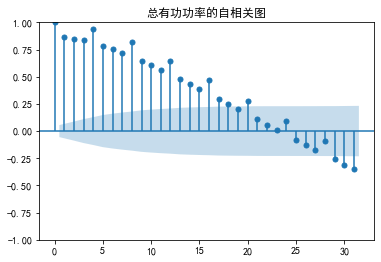

In [31]:
# 计算ACF,PACF
acf=plot_acf(train['总有功功率（kw）'])
plt.title("总有功功率的自相关图")
plt.show()


d:\python\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


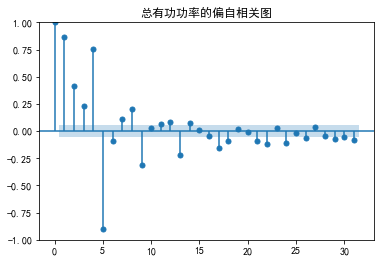

In [32]:
pacf=plot_pacf(train['总有功功率（kw）'])
plt.title("总有功功率的偏自相关图")
plt.show()


In [33]:
print(train)
train=train['总有功功率（kw）']
print(train.shape)

                       总有功功率（kw）  最高温度  最低温度  白天风力风向  夜晚风力风向  天气1  天气2     年  \
数据时间                                                                           
2021-08-18 00:00:00  224630.2460  36.0  27.0     322     322  212  187  2021   
2021-08-18 00:15:00  210183.8344  36.0  27.0     322     322  212  187  2021   
2021-08-18 00:30:00  211367.5946  36.0  27.0     322     322  212  187  2021   
2021-08-18 00:45:00  209119.0946  36.0  27.0     322     322  212  187  2021   
2021-08-18 01:00:00  224628.3495  36.0  27.0     322     322  212  187  2021   
...                          ...   ...   ...     ...     ...  ...  ...   ...   
2021-08-30 22:45:00  208090.0523  34.0  26.0     322     322   96  103  2021   
2021-08-30 23:00:00  224678.8417  34.0  26.0     322     322   96  103  2021   
2021-08-30 23:15:00  207940.9121  34.0  26.0     322     322   96  103  2021   
2021-08-30 23:30:00  207124.3572  34.0  26.0     322     322   96  103  2021   
2021-08-30 23:45:00  206003.3341  34.0  

In [38]:
model = sm.tsa.arima.ARIMA(train,order=(2,0,3))
arima_res=model.fit()
arima_res.summary()

d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)
d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)
d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)
d:\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              总有功功率（kw）   No. Observations:                 1248
Model:                 ARIMA(2, 0, 3)   Log Likelihood              -12978.394
Date:                Thu, 28 Apr 2022   AIC                          25970.788
Time:                        11:12:23   BIC                          26006.693
Sample:                    08-18-2021   HQIC                         25984.287
                         - 08-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.314e+05   1.51e-08   1.53e+13      0.000    2.31e+05    2.31e+05
ar.L1         -0.0673      0.010     -6.996      0.000      -0.086      -0.048
ar.L2          0.9327      0.010     96.943      0.000       0.914       0.952
ma.L1          1.3679      0.021     63.656      0.000       1.326       1.410
ma.L2          0.0044      0.042      0.105      0.916      -0.077       0.086
ma.L3         -0.4295      0.023    -19.030      0.000      -0.474      -0.385
sigma2      5.703e+07   7.06e-10   8.08e+16      0.000     5.7e+07     5.7e+07
===================================================================================
Ljung-Box (L1) (Q):                  26.91   Jarque-Bera (JB):                61.80
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.22e+31. Standard errors may be unstable.
"""

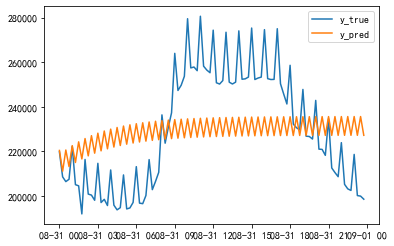

In [39]:
predict=arima_res.predict("2021/8/31 0:00:00","2021/8/31 23:45:00")
plt.plot(test.index,test['总有功功率（kw）'])
plt.plot(test.index,predict)
plt.legend(['y_true','y_pred'])
plt.show()

In [37]:
trend_evaluate = sm.tsa.arma_order_select_ic(train, ic=['aic', 'bic'], trend='n', max_ar=20,
                                            max_ma=5)
print('train AIC', trend_evaluate.aic_min_order)
print('train BIC', trend_evaluate.bic_min_order)

d:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
d:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting paramet

d:\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
d:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
d:\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
d:\python\lib\site-packages\stat

d:\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
d:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
d:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary sta

d:\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
d:\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
d:\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
d:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
d:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarni

train AIC (2, 3)
train BIC (2, 3)


In [48]:
from sklearn.metrics import r2_score,mean_absolute_error
mean_absolute_error(test['总有功功率（kw）'],predict)

20805.460508852084

残差分析

In [40]:
residual=list(test['总有功功率（kw）']-predict)

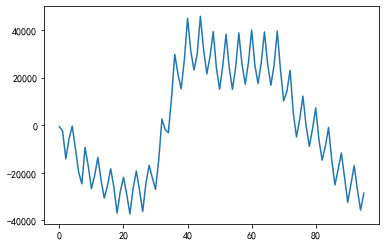

In [41]:
plt.plot(residual)

d:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


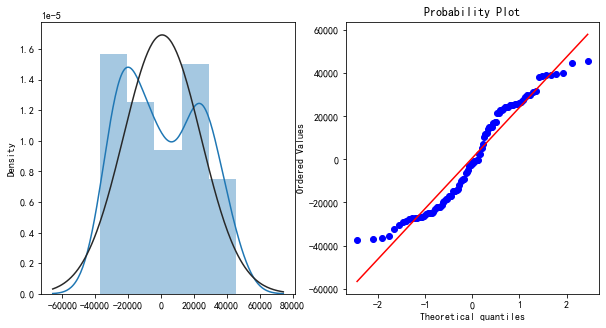

In [42]:
import seaborn as sns
from scipy import stats
plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
sns.distplot(residual,fit=stats.norm)
ax=plt.subplot(1,2,2)
res=stats.probplot(residual,plot=plt)
plt.show()

In [43]:
np.mean(residual)

678.4856481471801

In [44]:
print(sm.tsa.stattools.adfuller(residual))

(-1.7721469423778775, 0.3943749856599553, 6, 89, {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}, 1526.5927112991922)


另一种方法

In [47]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from statsmodels.stats.diagnostic import acorr_ljungbox
# from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
# plt.rcParams['font.sans-serif']=['Simhei']
# plt.rcParams['axes.unicode_minus']=False

In [46]:
# df=pd.read_csv(r'D:/比赛/B题/train.csv',parse_dates=['数据时间'])
# df=df[['数据时间','总有功功率（kw）']]
# df.head(3).append(df.tail(3))

In [45]:
# data=df.copy()
# data=data.set_index('数据时间')
# data.head(3).append(data.tail(3))